<a href="https://colab.research.google.com/github/SaiKrishhna2001/FSSE-Project-2/blob/main/FinalProjectFSSE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1

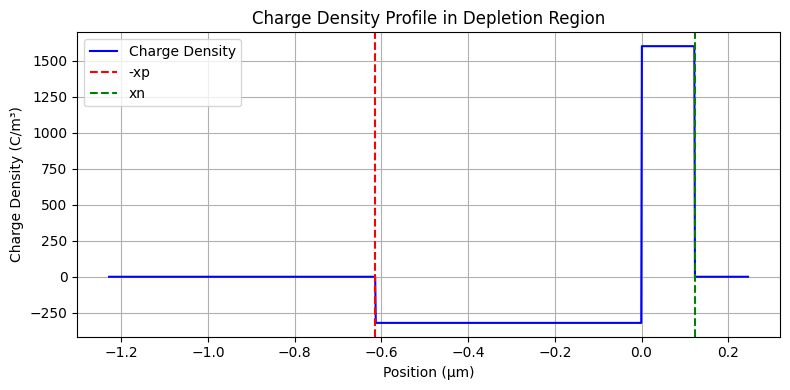

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, elementary_charge as q

# Parameters
epsilon_si = 11.7 * epsilon_0  # Permittivity of silicon (F/m)
Na = 2e15 * 1e6                # p-side doping in m^-3
Nd = 1e16 * 1e6                # n-side doping in m^-3
Vbi = 0.7                      # Built-in potential in Volts

# Calculate total depletion width
W = np.sqrt((2 * epsilon_si * Vbi / q) * (1 / Na + 1 / Nd))
xp = Nd / (Na + Nd) * W  # width into p-side
xn = Na / (Na + Nd) * W  # width into n-side

# Spatial domain
x = np.linspace(-2 * xp, 2 * xn, 1000)

# Charge profile (ρ)
rho = np.piecewise(
    x,
    [x < -xp, (-xp <= x) & (x < 0), (0 <= x) & (x <= xn), x > xn],
    [0, -q * Na, q * Nd, 0]
)

# Plotting the charge profile
plt.figure(figsize=(8, 4))
plt.plot(x * 1e6, rho, color='blue', label='Charge Density')
plt.axvline(-xp * 1e6, color='red', linestyle='--', label='-xp')
plt.axvline(xn * 1e6, color='green', linestyle='--', label='xn')
plt.title("Charge Density Profile in Depletion Region")
plt.xlabel("Position (µm)")
plt.ylabel("Charge Density (C/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Question 2

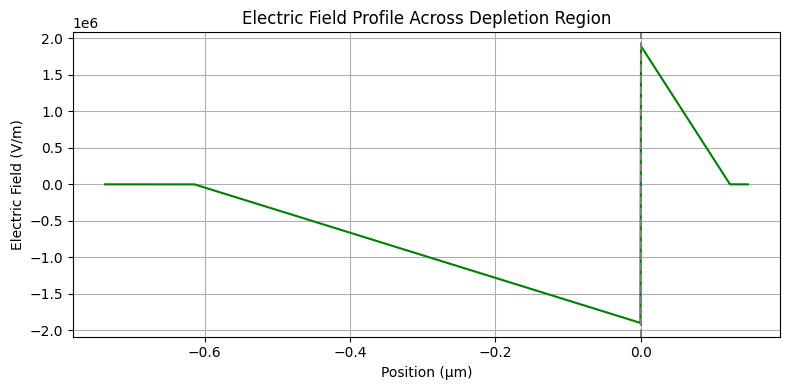

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, elementary_charge as q

# Parameters
epsilon_si = 11.7 * epsilon_0  # F/m
Na = 2e15 * 1e6                # m^-3
Nd = 1e16 * 1e6                # m^-3
Vbi = 0.7                      # V

# Depletion width calculation
W = np.sqrt((2 * epsilon_si * Vbi / q) * (1 / Na + 1 / Nd))
xp = Nd / (Na + Nd) * W
xn = Na / (Na + Nd) * W

# Spatial domain
x = np.linspace(-1.2 * xp, 1.2 * xn, 1000)

# Electric field profile
E = np.piecewise(
    x,
    [x < -xp,
     (-xp <= x) & (x < 0),
     (0 <= x) & (x <= xn),
     x > xn],
    [0,
     lambda x: -q * Na / epsilon_si * (x + xp),
     lambda x: q * Nd / epsilon_si * (xn - x),
     0]
)

# Plot Electric Field
plt.figure(figsize=(8, 4))
plt.plot(x * 1e6, E, color='green')
plt.axvline(0, color='gray', linestyle='--')
plt.title("Electric Field Profile Across Depletion Region")
plt.xlabel("Position (µm)")
plt.ylabel("Electric Field (V/m)")
plt.grid(True)
plt.tight_layout()
plt.show()


Question 3

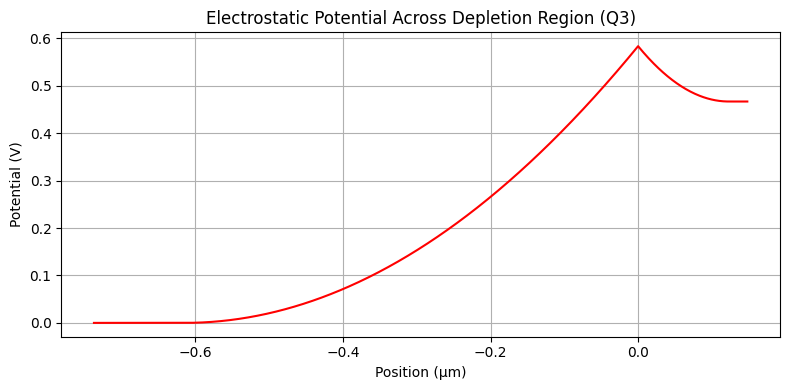

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, elementary_charge as q

# Constants
epsilon_si = 11.7 * epsilon_0  # F/m
Na = 2e15 * 1e6                # m^-3
Nd = 1e16 * 1e6                # m^-3
Vbi = 0.7                      # Built-in voltage (V)

# Depletion width and regions
W = np.sqrt((2 * epsilon_si * Vbi / q) * (1 / Na + 1 / Nd))
xp = Nd / (Na + Nd) * W  # p-side width
xn = Na / (Na + Nd) * W  # n-side width

# Position vector spanning slightly beyond depletion region
x = np.linspace(-1.2 * xp, 1.2 * xn, 1000)

# Electric field definition (from Q2)
E = np.piecewise(
    x,
    [x < -xp,
     (-xp <= x) & (x < 0),
     (0 <= x) & (x <= xn),
     x > xn],
    [0,
     lambda x: -q * Na / epsilon_si * (x + xp),
     lambda x: q * Nd / epsilon_si * (xn - x),
     0]
)

# Numerically integrate E(x) to get V(x)
V = -np.cumsum(E) * (x[1] - x[0])
V -= V.min()  # Shift potential so that V(x = -xp) = 0

# Plotting the potential
plt.figure(figsize=(8, 4))
plt.plot(x * 1e6, V, color='red')
plt.title("Electrostatic Potential Across Depletion Region (Q3)")
plt.xlabel("Position (µm)")
plt.ylabel("Potential (V)")
plt.grid(True)
plt.tight_layout()
plt.show()


Question 4

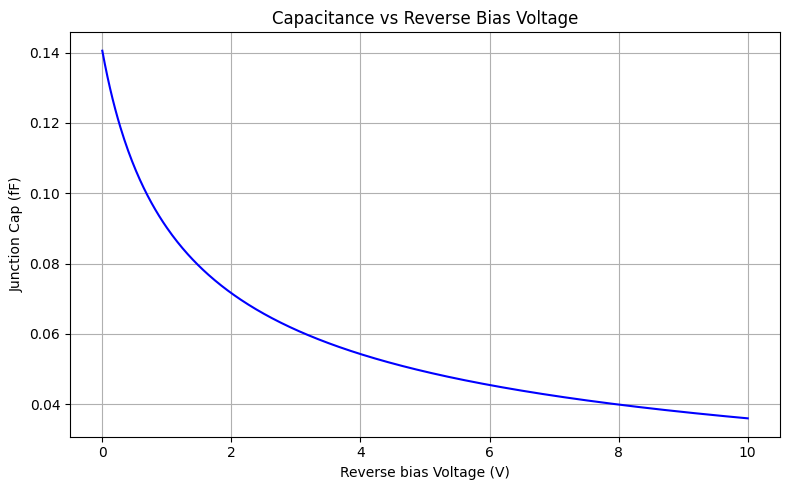

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import epsilon_0, elementary_charge as q

# -------------------------------
# Constants and Inputs
# -------------------------------
epsilon_si = 11.7 * epsilon_0  # Permittivity of silicon in F/m
Na = 2e15 * 1e6  # p-side doping in m^-3
Nd = 1e16 * 1e6  # n-side doping in m^-3
V_bi = 0.7  # Built-in voltage in volts

# Effective doping concentration (m^-3)
N_eff = (Na * Nd) / (Na + Nd)

# Reverse bias voltage range (0V to 10V)
Vr = np.linspace(0, 10, 500)

# -------------------------------
# Junction Capacitance Calculation
# -------------------------------
# Capacitance per unit area (F/m²)
C = np.sqrt((q * epsilon_si * N_eff) / (2 * (V_bi + Vr)))

# Convert to femtoFarads for 1 μm² area
C_fF = C * 1e-12 * 1e15  # F/m² × (1e-12 m²) → fF

# -------------------------------
# Plot
# -------------------------------
plt.figure(figsize=(8, 5))
plt.plot(Vr, C_fF, color='blue')
plt.xlabel("Reverse bias Voltage (V)")
plt.ylabel("Junction Cap (fF)")
plt.title("Capacitance vs Reverse Bias Voltage")
plt.grid(True)
plt.tight_layout()
plt.show()


Question 5

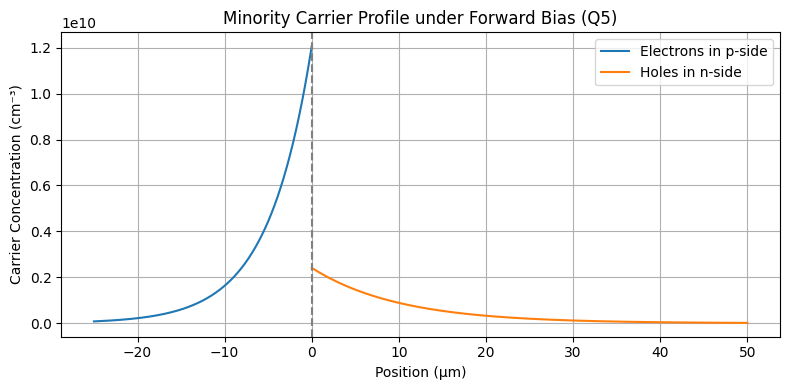

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and parameters
ni = 1.5e10               # intrinsic carrier concentration (cm^-3)
Na = 2e15                 # p-side doping (cm^-3)
Nd = 1e16                 # n-side doping (cm^-3)
Va = 0.3                  # forward bias voltage (V)
Vt = 0.0259               # thermal voltage at 300K (V)

# Diffusion lengths (assumed)
Ln = 5                    # µm, for electrons in p-side
Lp = 10                   # µm, for holes in n-side

# Equilibrium minority carrier concentrations
np0 = ni**2 / Na          # electron conc. in p-side
pn0 = ni**2 / Nd          # hole conc. in n-side

# Position arrays
x_p = np.linspace(-5 * Ln, 0, 500)   # p-side
x_n = np.linspace(0, 5 * Lp, 500)    # n-side

# Minority carrier distributions
np_x = np0 * (np.exp(Va / Vt) - 1) * np.exp(x_p / Ln) + np0
pn_x = pn0 * (np.exp(Va / Vt) - 1) * np.exp(-x_n / Lp) + pn0

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(x_p, np_x, label="Electrons in p-side")
plt.plot(x_n, pn_x, label="Holes in n-side")
plt.axvline(0, color='gray', linestyle='--')
plt.xlabel("Position (µm)")
plt.ylabel("Carrier Concentration (cm⁻³)")
plt.title("Minority Carrier Profile under Forward Bias (Q5)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Question 6

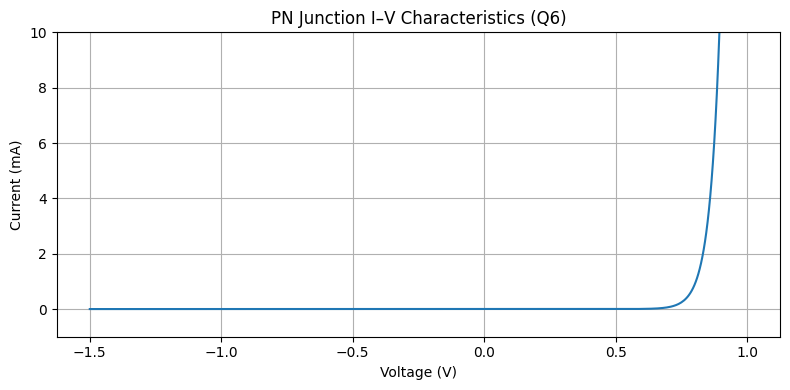

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Is = 1e-12     # Saturation current in Amps
n = 1.5        # Ideality factor
Vt = 0.0259    # Thermal voltage at 300K (V)

# Voltage range for forward and reverse bias
V = np.linspace(-1.5, 1.0, 500)

# Diode current using Shockley equation
I = Is * (np.exp(V / (n * Vt)) - 1)
I_mA = I * 1e3  # Convert to mA

# Plot
plt.figure(figsize=(8, 4))
plt.plot(V, I_mA)
plt.title("PN Junction I–V Characteristics (Q6)")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (mA)")
plt.grid(True)
plt.ylim(-1, 10)
plt.tight_layout()
plt.show()


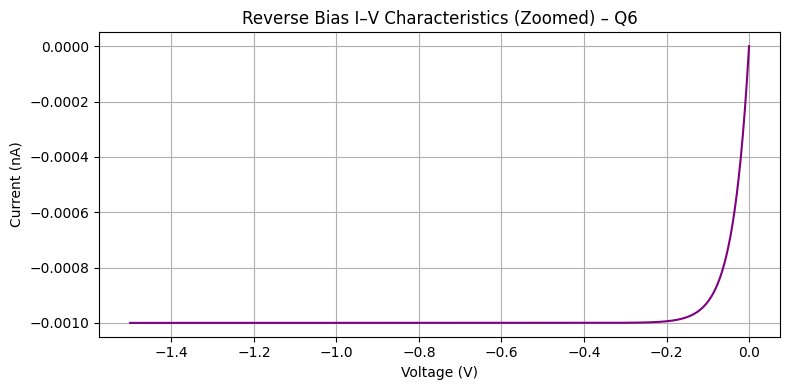

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Is = 1e-12     # Saturation current (A)
n = 1.5        # Ideality factor
Vt = 0.0259    # Thermal voltage (V)

# Reverse bias voltage range
V_reverse = np.linspace(-1.5, 0, 300)
I_reverse = Is * (np.exp(V_reverse / (n * Vt)) - 1)
I_reverse_nA = I_reverse * 1e9  # Convert to nA

# Plot reverse bias current
plt.figure(figsize=(8, 4))
plt.plot(V_reverse, I_reverse_nA, color='purple')
plt.title("Reverse Bias I–V Characteristics (Zoomed) – Q6")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (nA)")
plt.grid(True)
plt.tight_layout()
plt.show()


Question 7

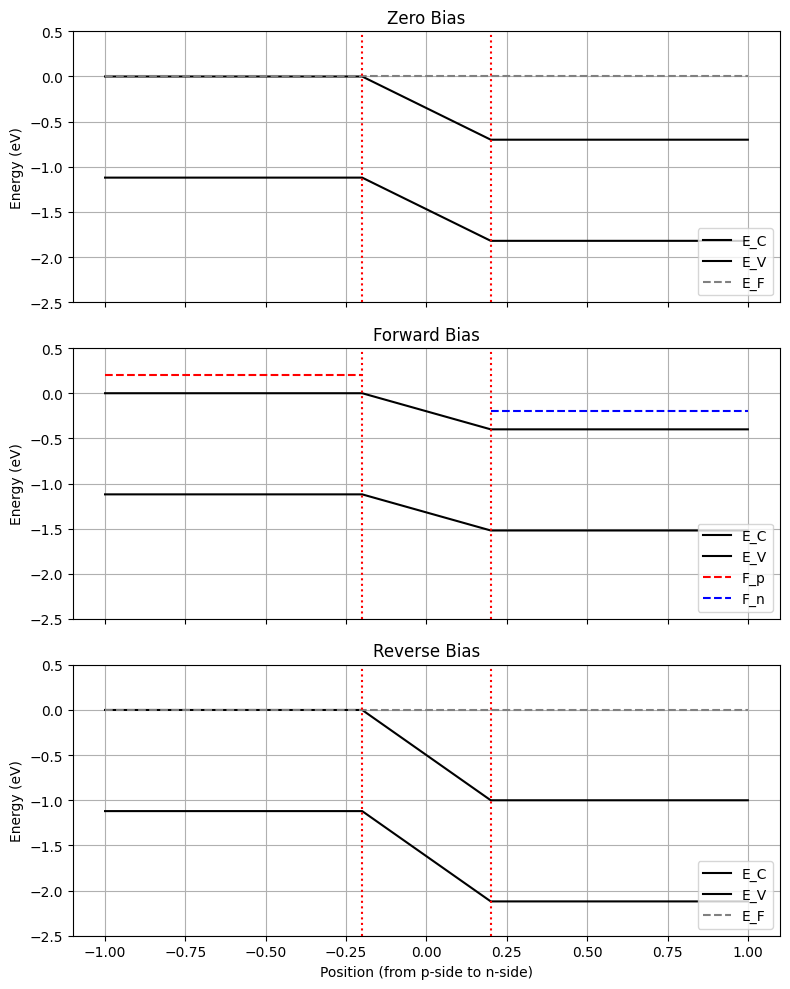

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Eg = 1.12  # Band gap energy in eV
Vbi = 0.7  # Built-in potential
Vf = 0.3   # Forward bias
Vr = 0.3   # Reverse bias

# X coordinates (p to n side)
x = np.array([-1, -0.2, 0.2, 1])

# Helper to plot bands
def plot_band(ax, Ec, Ev, title, fermi_levels=None):
    ax.plot(x, Ec, label='E_C', color='black')
    ax.plot(x, Ev, label='E_V', color='black')
    if fermi_levels:
        ax.hlines(fermi_levels[0], -1, -0.2, colors='red', linestyles='--', label='F_p')
        ax.hlines(fermi_levels[1], 0.2, 1, colors='blue', linestyles='--', label='F_n')
    else:
        ax.hlines(0, -1, 1, colors='gray', linestyles='--', label='E_F')
    ax.axvline(-0.2, color='red', linestyle=':')
    ax.axvline(0.2, color='red', linestyle=':')
    ax.set_ylim(-2.5, 0.5)
    ax.set_xlim(-1.1, 1.1)
    ax.set_ylabel("Energy (eV)")
    ax.set_title(title)
    ax.grid(True)
    ax.legend(loc='lower right')

# Energy band profiles for each case
Ec0 = [0, 0, -Vbi, -Vbi]  # Zero bias
Ev0 = [e - Eg for e in Ec0]

EcF = [0, 0, -(Vbi - Vf), -(Vbi - Vf)]  # Forward bias
EvF = [e - Eg for e in EcF]

EcR = [0, 0, -(Vbi + Vr), -(Vbi + Vr)]  # Reverse bias
EvR = [e - Eg for e in EcR]

# Plot
fig, axs = plt.subplots(3, 1, figsize=(8, 10), sharex=True)
plot_band(axs[0], Ec0, Ev0, "Zero Bias")
plot_band(axs[1], EcF, EvF, "Forward Bias", fermi_levels=(0.2, -0.2))
plot_band(axs[2], EcR, EvR, "Reverse Bias")
axs[2].set_xlabel("Position (from p-side to n-side)")
plt.tight_layout()
plt.show()
